<a href="https://www.kaggle.com/code/akashshukla47/humanmotionclassify-analyzing-and-classifying-act?scriptVersionId=194949977" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Dataset Insights

The dataset provides sensor data collected from 22 individuals who wore two 3-axial accelerometers for roughly 2 hours in everyday situations. These sensors were attached to the right thigh and lower back. The activities corresponding to the recorded signals were annotated by an observer.

## Activity Descriptions

The activities recorded in the dataset are classified as follows:

| **Activity Code** | **Description**                      |
|-------------------|--------------------------------------|
| 1                 | Walking                              |
| 2                 | Running                              |
| 3                 | Shuffling                            |
| 4                 | Stairs (Ascending)                   |
| 5                 | Stairs (Descending)                  |
| 6                 | Standing                             |
| 7                 | Sitting                              |
| 8                 | Lying                                |
| 13                | Cycling (Sit)                         |
| 14                | Cycling (Stand)                       |
| 130               | Cycling (Sit, Inactive)               |
| 140               | Cycling (Stand, Inactive)             |

## Important Notes

- **Purpose**: The dataset is intended for analyzing and modeling human activity recognition.
- **Usage**: If this analysis proves useful, please consider giving an upvote to this kernel. Your support helps drive further research and development in this domain.

Feel free to explore and leverage this dataset for various analytical and machine learning tasks!


# Python Environment Overview

This environment is built on the Kaggle Python Docker image, which includes various useful libraries for data analysis and machine learning.

## Available Libraries

- **NumPy**: For numerical operations and linear algebra.
- **Pandas**: For data manipulation and processing, including reading CSV files.

## Data Files

The following datasets are loaded and available for analysis:

- **Training Data**
  - **File**: `train.csv`
  - **Path**: `/kaggle/input/human-activity-recognition-trondheim-harth/train.csv`
  - **Description**: Contains features and activity labels for training the models.

- **Testing Data**
  - **File**: `test.csv`
  - **Path**: `/kaggle/input/human-activity-recognition-trondheim-harth/test.csv`
  - **Description**: Contains features used to evaluate the models. Activity labels are not included in this dataset.

## File Management

- **Persistent Storage**: You can write up to 20GB of files to the `/kaggle/working/` directory, and these files will be preserved across sessions.
- **Temporary Storage**: Files saved to `/kaggle/temp/` are temporary and will be removed after the session ends.

Use these paths to access and manage your data effectively throughout your analysis.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-activity-recognition-trondheim-harth/train.csv
/kaggle/input/human-activity-recognition-trondheim-harth/test.csv


# Data Preprocessing

## Libraries
- **pandas**: Data manipulation
- **numpy**: Numerical computations
- **sklearn**: Data splitting, scaling, and balancing

## Data Loading
- **Training Data**: Loaded from `train.csv`
- **Testing Data**: Loaded from `test.csv`

## Training Data
- **Missing Values**: Filled with median values
- **Class Imbalance**: Minority classes upsampled to balance with the majority class
- **Feature/Target Separation**: Features (`X_train`) and target (`y_train`) separated

## Testing Data
- **Missing Values**: Filled with median values
- **Feature/Target Separation**: Features (`X_test`) and target (`y_test`) separated

## Feature Scaling
- **Standardization**: Features scaled using `StandardScaler`


In [2]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.utils import resample  # For handling class imbalance

# Load training and testing datasets
train_df = pd.read_csv('/kaggle/input/human-activity-recognition-trondheim-harth/train.csv')
test_df = pd.read_csv('/kaggle/input/human-activity-recognition-trondheim-harth/test.csv')

# Preprocess training data
# Handle missing values in training data by filling them with the median of each column
train_df.fillna(train_df.median(), inplace=True)

# Address class imbalances in training data
# Assume 'Activity' is the target column representing different human activities
majority_class = train_df[train_df['Activity'] == train_df['Activity'].value_counts().idxmax()]  # Extract majority class
minority_classes = train_df[train_df['Activity'] != train_df['Activity'].value_counts().idxmax()]  # Extract minority classes

# Upsample minority classes to match the majority class
minority_upsampled = resample(minority_classes,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match the number of samples in majority class
                              random_state=42)  # Seed for reproducibility

# Combine the upsampled minority class with the majority class to create a balanced dataset
train_df_balanced = pd.concat([majority_class, minority_upsampled])

# Separate features and target variable for training data
X_train = train_df_balanced.drop('Activity', axis=1)  # Features
y_train = train_df_balanced['Activity']  # Target

# Preprocess testing data
# Handle missing values in testing data by filling them with the median of each column
test_df.fillna(test_df.median(), inplace=True)

# Separate features and target variable for testing data
X_test = test_df.drop('Activity', axis=1)  # Features
y_test = test_df['Activity']  # Target

# Standardize the features using StandardScaler
scaler = StandardScaler()  # Initialize the scaler
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)  # Transform the test data


# Model Training and Evaluation

This section covers the training and evaluation of three classification models: AdaBoost, CatBoost, and Random Forest.

## Model Initialization and Training

- **AdaBoostClassifier**: Initialized with 100 estimators and trained on the training data.
- **CatBoostClassifier**: Initialized with 100 iterations and trained on the training data, with verbosity turned off.
- **RandomForestClassifier**: Initialized with 100 estimators and trained on the training data.

## Predictions

Each trained model is used to make predictions on the test set:

- **AdaBoost**: Predictions are stored in `y_pred_ada`.
- **CatBoost**: Predictions are stored in `y_pred_cat`.
- **Random Forest**: Predictions are stored in `y_pred_rf`.

## Model Evaluation

A function is defined to evaluate and print the performance of each model:

- **Precision**: Weighted precision score for each model.
- **Recall**: Weighted recall score for each model.
- **F1 Score**: Weighted F1 score for each model.
- **Classification Report**: Detailed metrics including precision, recall, and F1 score for each class.
- **Confusion Matrix**: Matrix showing true vs. predicted class counts.

### Evaluation Results

- **AdaBoost**: Performance metrics and confusion matrix for AdaBoost.
- **CatBoost**: Performance metrics and confusion matrix for CatBoost.
- **Random Forest**: Performance metrics and confusion matrix for Random Forest.

These evaluations provide insights into the effectiveness of each model in classifying the test data.


In [3]:
# Import necessary libraries for models and evaluation
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Initialize classifiers
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
cat = CatBoostClassifier(iterations=100, random_state=42, verbose=0)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models using the training data
ada.fit(X_train, y_train)
cat.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = ada.predict(X_test)
y_pred_cat = cat.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Function to evaluate and print model performance
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

# Evaluate models
evaluate_model(y_test, y_pred_ada, "AdaBoost")
evaluate_model(y_test, y_pred_cat, "CatBoost")
evaluate_model(y_test, y_pred_rf, "Random Forest")


--- AdaBoost ---
Precision: 0.7093697188372015
Recall: 0.7341133900708269
F1 Score: 0.7121695425998211
Classification Report:
               precision    recall  f1-score   support

         1.0       0.60      0.72      0.65    189538
         2.0       0.53      0.41      0.46     77001
         3.0       0.22      0.01      0.01     53835
         4.0       0.00      0.00      0.00     15922
         5.0       0.00      0.00      0.00     13086
         6.0       0.63      0.86      0.73    139104
         7.0       0.95      0.95      0.95    486667
         8.0       0.80      0.67      0.73    113218
        13.0       0.48      0.62      0.54     77030
        14.0       0.10      0.16      0.12     17006
       130.0       0.16      0.03      0.05      9415
       140.0       0.05      0.15      0.08      1510

    accuracy                           0.73   1193332
   macro avg       0.38      0.38      0.36   1193332
weighted avg       0.71      0.73      0.71   1193332

Confus

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
import numpy as np


# Data Visualization

This section visualizes class and feature distributions using Matplotlib.

## Handling Data

Infinite values are replaced with NaN, and rows with NaN values are removed to ensure clean data for plotting.

## Class Distribution

- **Before Balancing**: A bar chart shows the original class distribution.
- **After Balancing**: A bar chart displays the class distribution post-balancing.

## Feature Distributions

Histograms visualize the distribution of selected features in the balanced dataset.


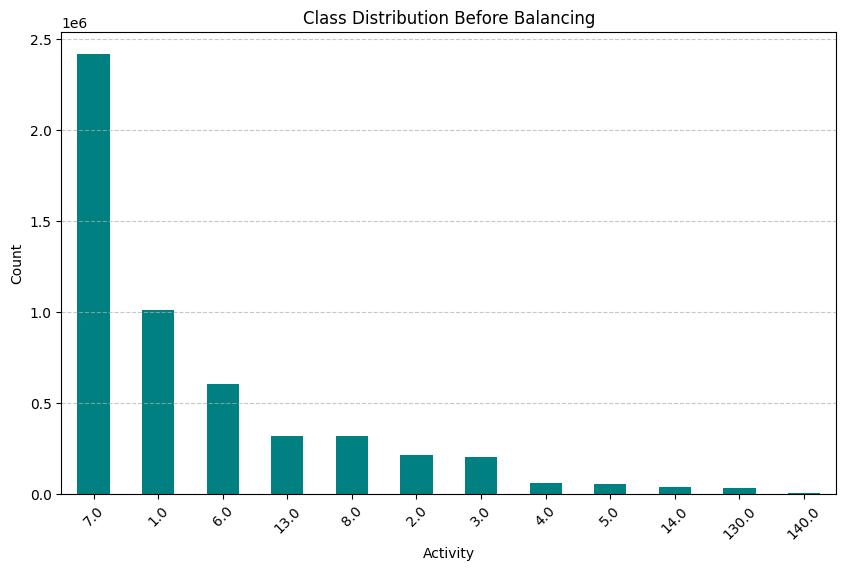

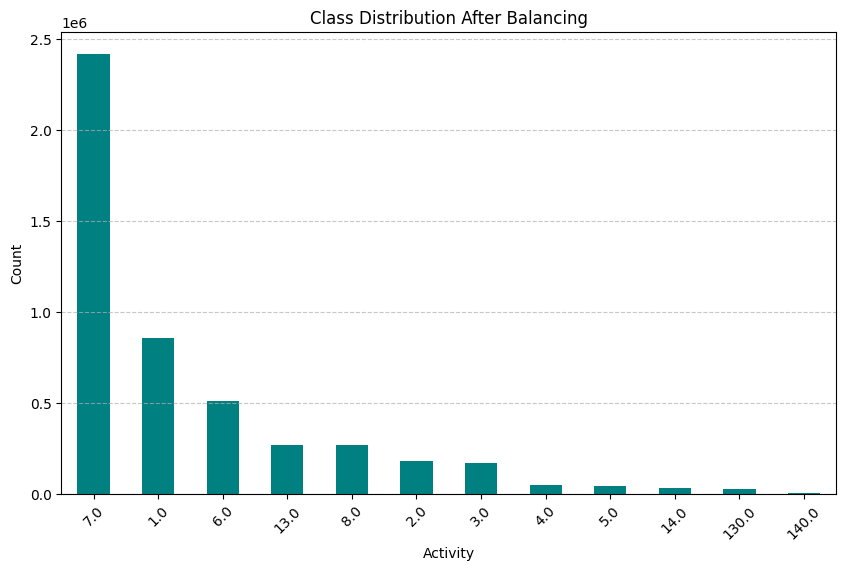

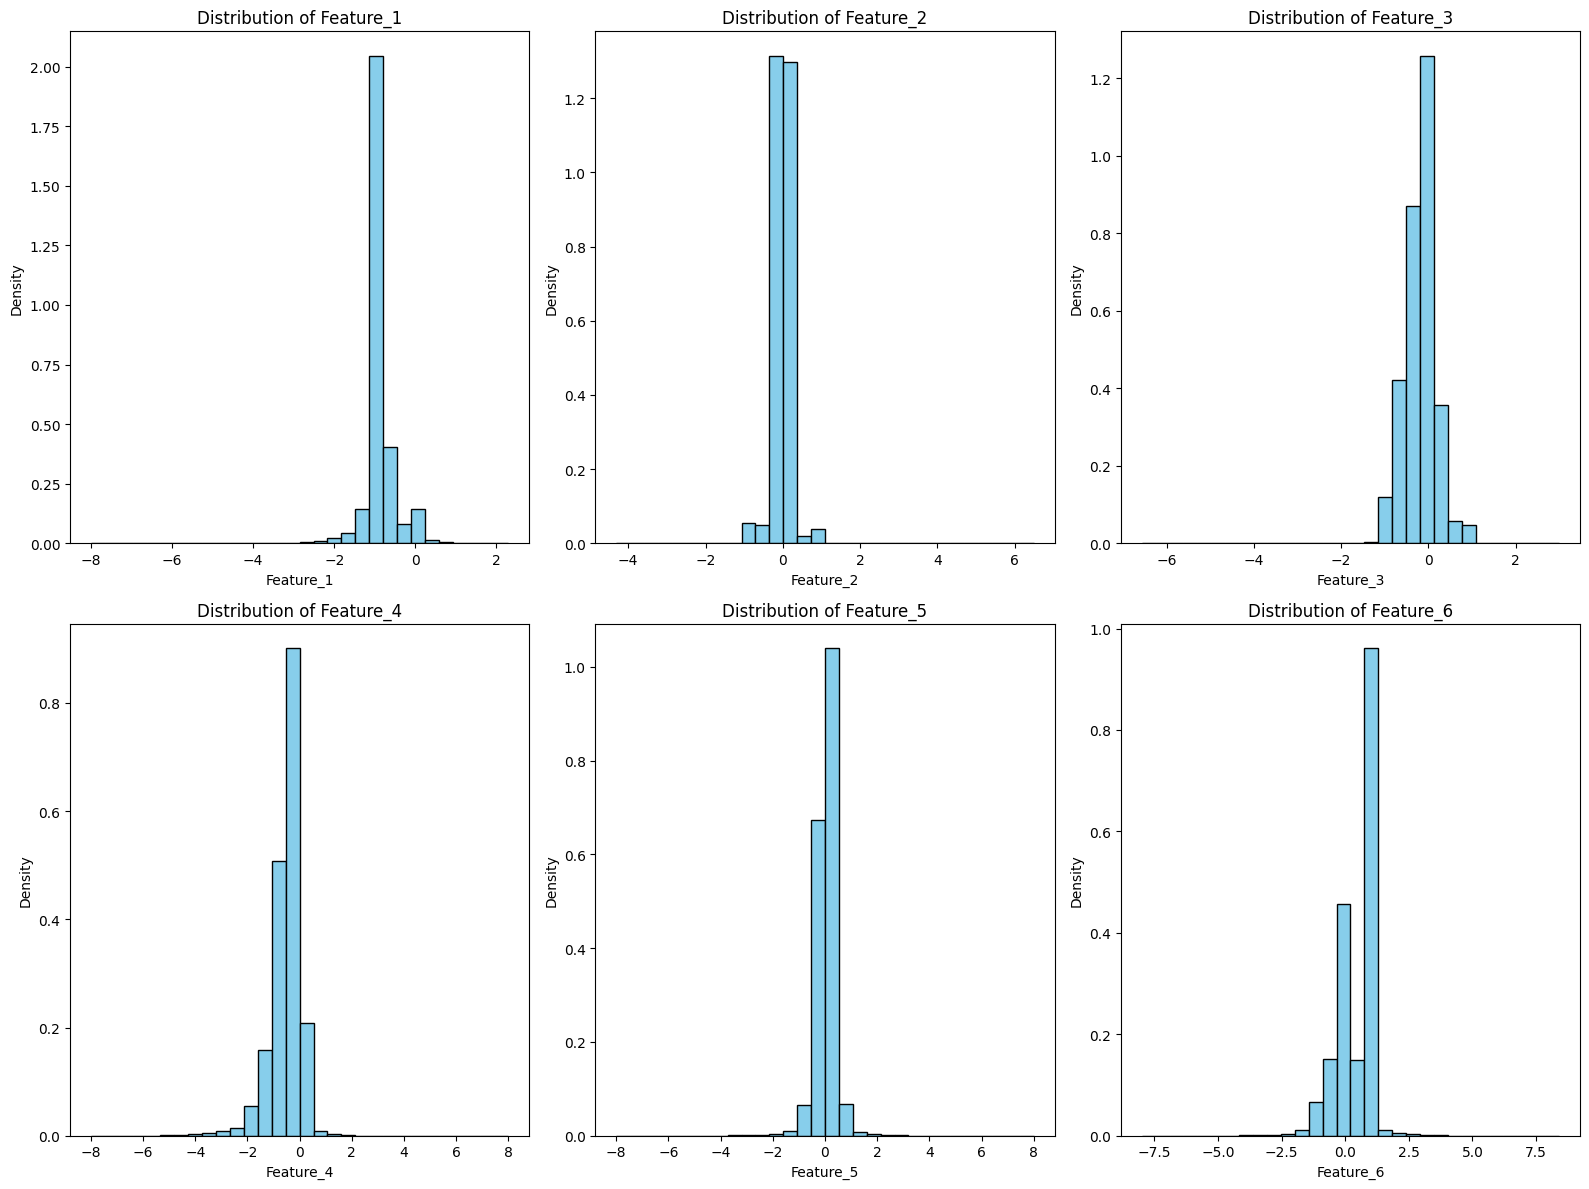

In [5]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert infinite values to NaN for both training and balanced dataframes
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df_balanced.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values, if any, for plotting
train_df.dropna(inplace=True)
train_df_balanced.dropna(inplace=True)

# Plot class distribution before balancing using matplotlib
plt.figure(figsize=(10, 6))
train_df['Activity'].value_counts().plot(kind='bar', color='teal')
plt.title('Class Distribution Before Balancing')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot class distribution after balancing using matplotlib
plt.figure(figsize=(10, 6))
train_df_balanced['Activity'].value_counts().plot(kind='bar', color='teal')
plt.title('Class Distribution After Balancing')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot feature distributions using matplotlib
# Selecting a few feature columns for distribution plots
feature_cols = train_df_balanced.columns.drop('Activity')

# Plotting distributions of the first few features as an example
plt.figure(figsize=(16, 12))

# Adjust to show more/less features; here it shows the first 6 features
for i, col in enumerate(feature_cols[:6]):
    plt.subplot(2, 3, i + 1)
    plt.hist(train_df_balanced[col].dropna(), bins=30, color='skyblue', edgecolor='black', density=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


# Confusion Matrix Visualization

This section visualizes the confusion matrices for different classification models using Matplotlib and Seaborn.

## Function to Plot Confusion Matrices

A function is defined to plot confusion matrices, with an option to normalize the values. The confusion matrix shows the performance of a classification model by comparing true labels with predicted labels.

- **Normalization**: If normalization is enabled, the confusion matrix is scaled to show proportions instead of raw counts, providing a clearer view of class prediction accuracy.
- **Annotations**: The matrix values are annotated for better readability.

## Confusion Matrices for Each Model

### Without Normalization

Confusion matrices are plotted for the following models:

- **AdaBoost**
- **CatBoost**
- **Random Forest**

These plots display the raw counts of true vs. predicted labels for each model.

### With Normalization

Normalized confusion matrices are also plotted for each model to visualize the proportions of correctly and incorrectly classified samples, allowing for a better understanding of model performance across classes.



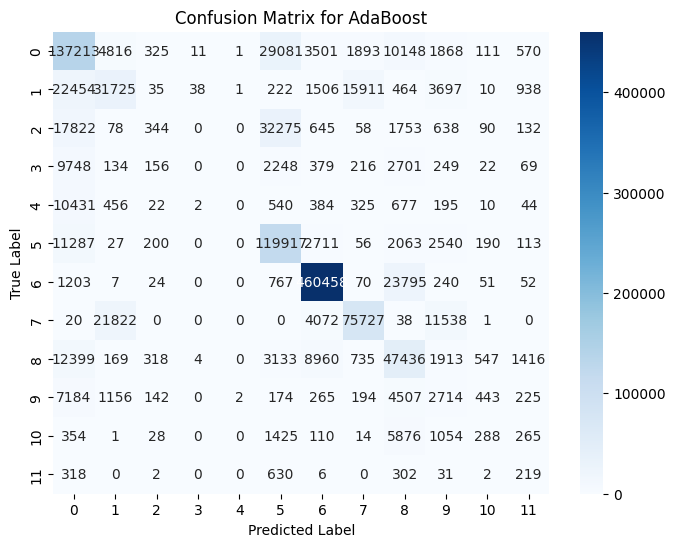

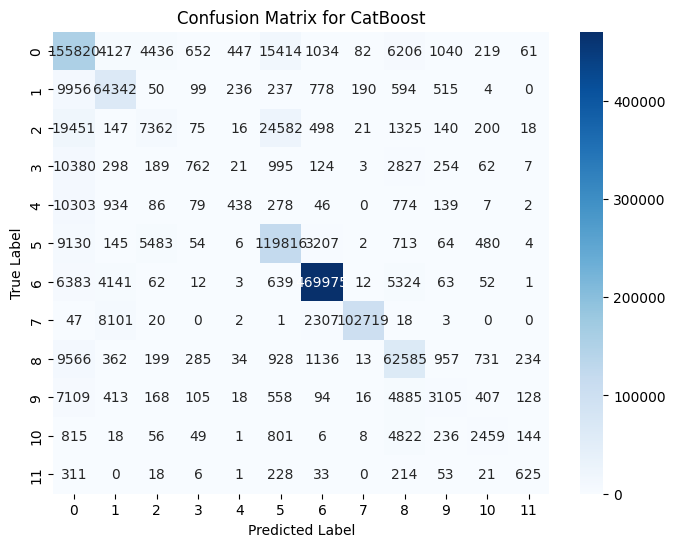

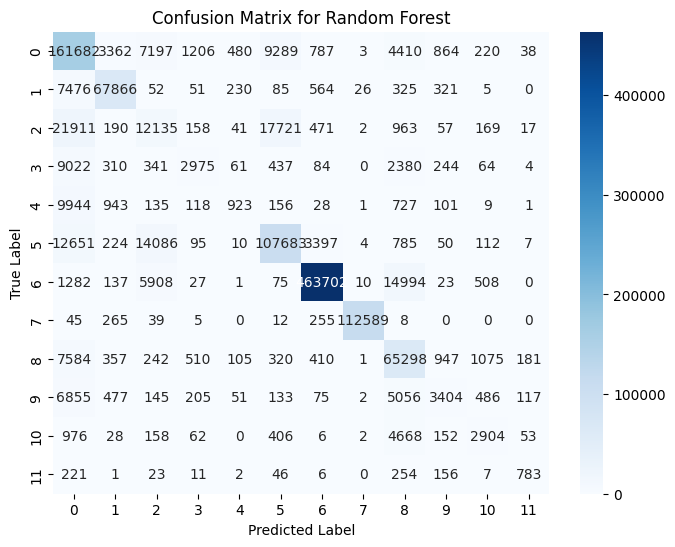

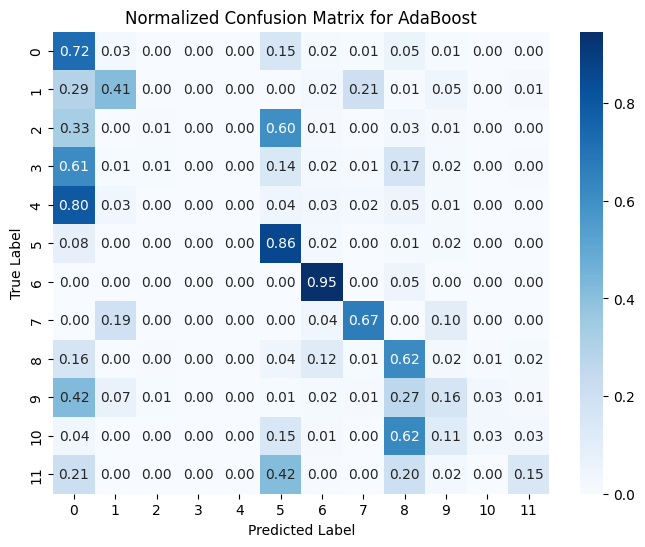

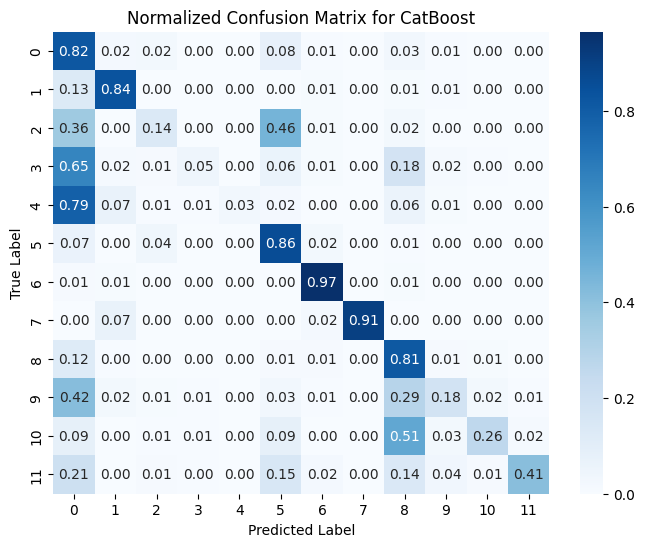

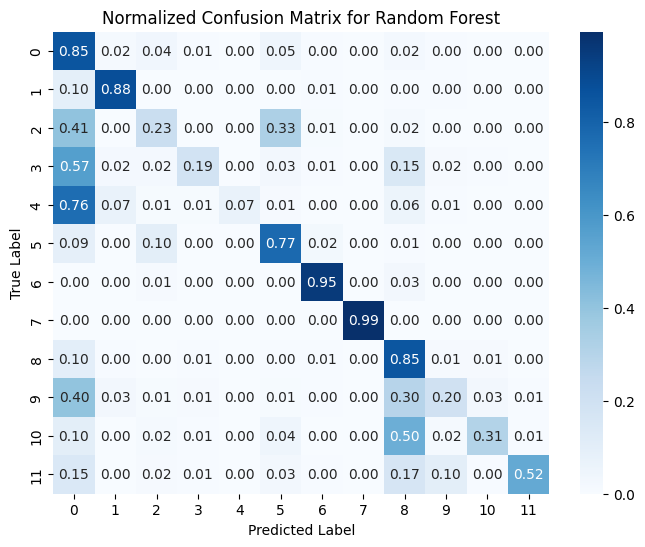

In [6]:
# Function to plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, model_name, normalize=False):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
        title = f'Normalized Confusion Matrix for {model_name}'
    else:
        fmt = 'd'
        title = f'Confusion Matrix for {model_name}'

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plotting confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_ada, "AdaBoost")
plot_confusion_matrix(y_test, y_pred_cat, "CatBoost")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# Plotting normalized confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_ada, "AdaBoost", normalize=True)
plot_confusion_matrix(y_test, y_pred_cat, "CatBoost", normalize=True)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest", normalize=True)


# ROC Curve Visualization

This section visualizes ROC curves for different classification models, allowing us to evaluate their performance across multiple classes.

## Binarizing Labels

To plot ROC curves for multi-class classification, the output labels are binarized. This converts the class labels into a binary format suitable for ROC curve computation.

## Function to Plot ROC Curves

A function is defined to plot ROC curves:

- **True Positive Rate (TPR)** and **False Positive Rate (FPR)** are computed for each class.
- Each ROC curve is plotted with its AUC (Area Under the Curve) value, which summarizes the performance of the model across different threshold settings.

## ROC Curves for Each Model

### AdaBoost

The ROC curve for AdaBoost is plotted based on the predicted probabilities. The plot shows the TPR vs. FPR for each class, along with the AUC values.

### CatBoost

Similarly, the ROC curve for CatBoost is generated using its predicted probabilities, providing insights into its performance for each class.

### Random Forest

The ROC curve for Random Forest is also plotted, showcasing how well it discriminates between classes.

Each plot includes ROC curves for all classes, allowing a comprehensive evaluation of each model's classification performance.


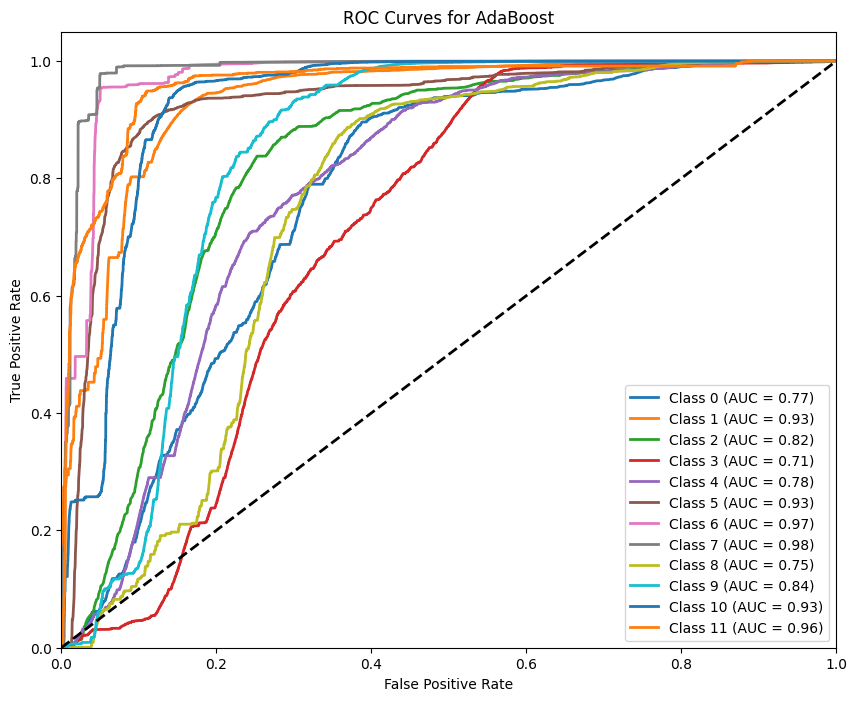

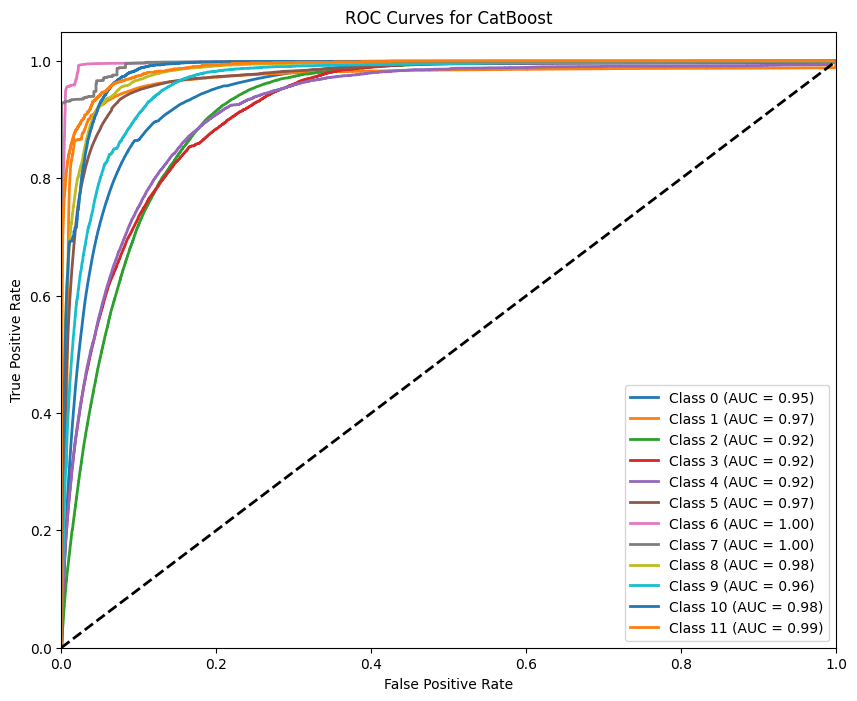

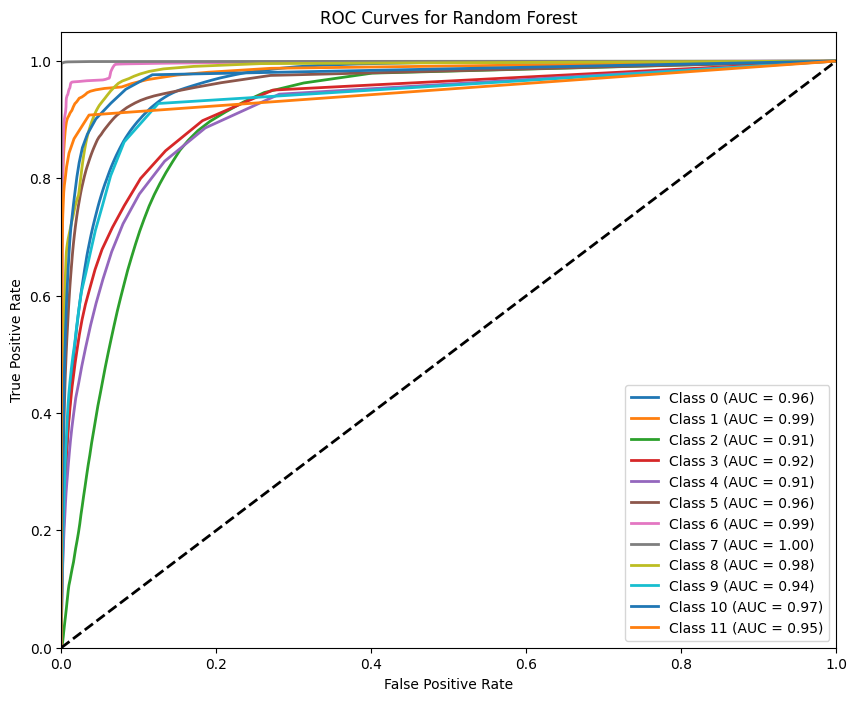

In [7]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Function to plot ROC curves
def plot_roc_curve(y_true_bin, y_score, model_name, n_classes):
    plt.figure(figsize=(10, 8))
    
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# For AdaBoost
y_score_ada = ada.predict_proba(X_test)
plot_roc_curve(y_test_bin, y_score_ada, "AdaBoost", n_classes)

# For CatBoost
y_score_cat = cat.predict_proba(X_test)
plot_roc_curve(y_test_bin, y_score_cat, "CatBoost", n_classes)

# For Random Forest
y_score_rf = rf.predict_proba(X_test)
plot_roc_curve(y_test_bin, y_score_rf, "Random Forest", n_classes)


# Precision-Recall Curve Visualization

This section visualizes Precision-Recall (PR) curves for different classification models, providing insights into their performance, particularly in scenarios with imbalanced datasets.

## Function to Plot Precision-Recall Curves

A function is defined to plot PR curves:

- **Precision** and **Recall** are computed for each class.
- Each PR curve is plotted with its Average Precision (AP) score, summarizing the model's performance for each class.

## Precision-Recall Curves for Each Model

### AdaBoost

The PR curve for AdaBoost is plotted using its predicted probabilities, showing the trade-off between precision and recall for each class.

### CatBoost

Similarly, the PR curve for CatBoost is plotted, illustrating its precision-recall performance across different classes.

### Random Forest

The PR curve for Random Forest is also visualized, providing an overview of its precision and recall metrics.

Each plot includes PR curves for all classes, highlighting how each model performs in terms of precision and recall across different thresholds.


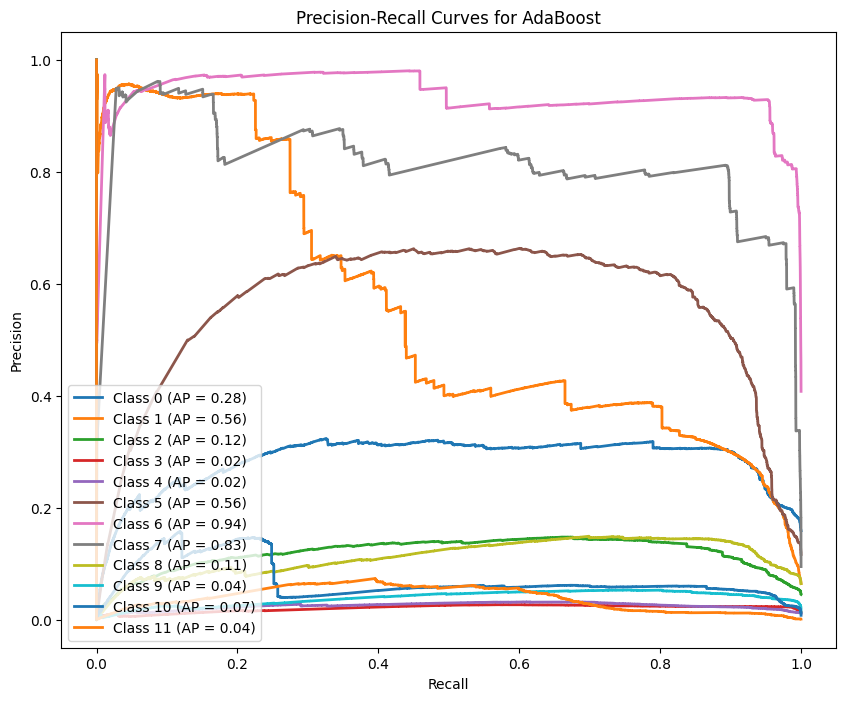

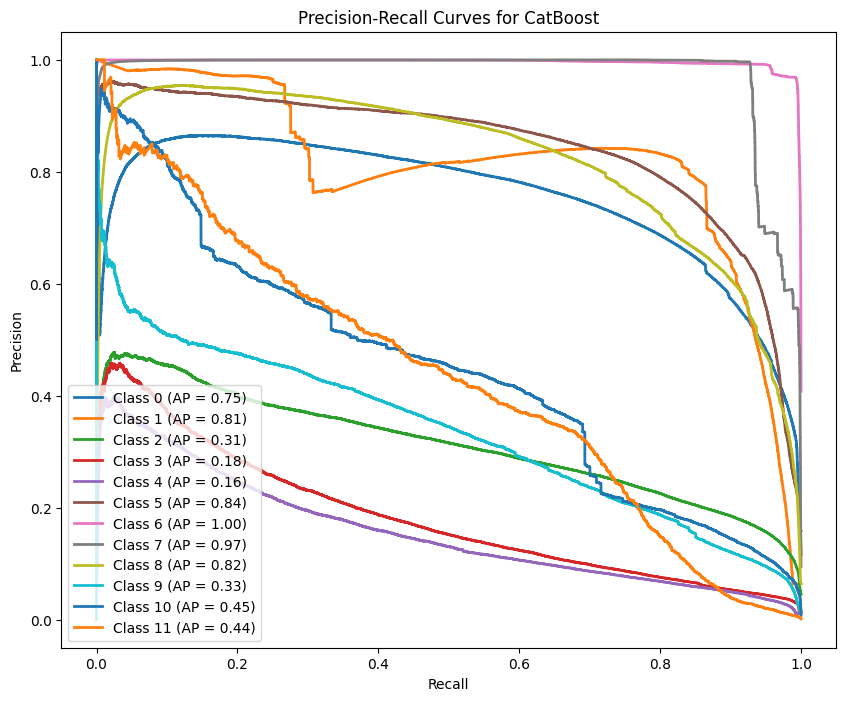

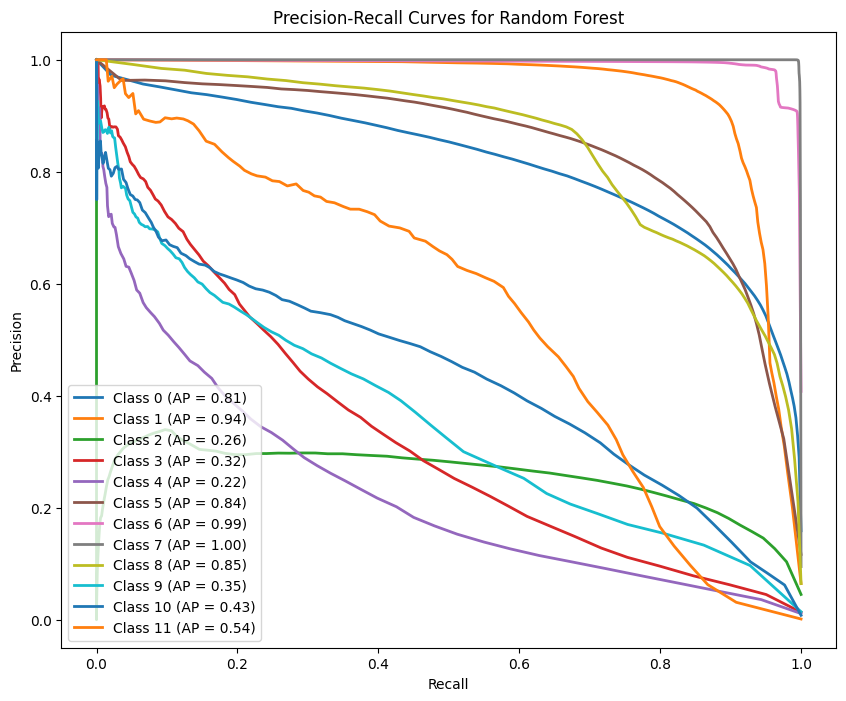

In [8]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Function to plot Precision-Recall curves
def plot_precision_recall_curve(y_true_bin, y_score, model_name, n_classes):
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i} (AP = {average_precision_score(y_true_bin[:, i], y_score[:, i]):.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curves for {model_name}')
    plt.legend(loc='lower left')
    plt.show()

# For AdaBoost
plot_precision_recall_curve(y_test_bin, y_score_ada, "AdaBoost", n_classes)

# For CatBoost
plot_precision_recall_curve(y_test_bin, y_score_cat, "CatBoost", n_classes)

# For Random Forest
plot_precision_recall_curve(y_test_bin, y_score_rf, "Random Forest", n_classes)


# Feature Importance Visualization

This section visualizes feature importances for three classification models: Random Forest, CatBoost, and AdaBoost.

## Feature Importance Extraction

Feature names are extracted from the training dataset by dropping the target column. This ensures that the feature importance plots are labeled correctly.

## Random Forest

The feature importances for the Random Forest model are plotted:

- **Feature Importances**: Plotted as a bar chart showing the relative importance of each feature.
- **Sorting**: Features are sorted in descending order of importance.

## CatBoost

The feature importances for the CatBoost model are visualized:

- **Feature Importances**: Displayed in a bar chart, with features sorted by their importance scores.

## AdaBoost

Feature importances for the AdaBoost model are plotted:

- **Feature Importances**: If the base estimator has feature importances, they are used directly; otherwise, the average importance across all trees in the AdaBoost ensemble is calculated and plotted.

Each plot includes feature names on the x-axis and their corresponding importance scores on the y-axis, providing a clear view of which features are most influential for each model.


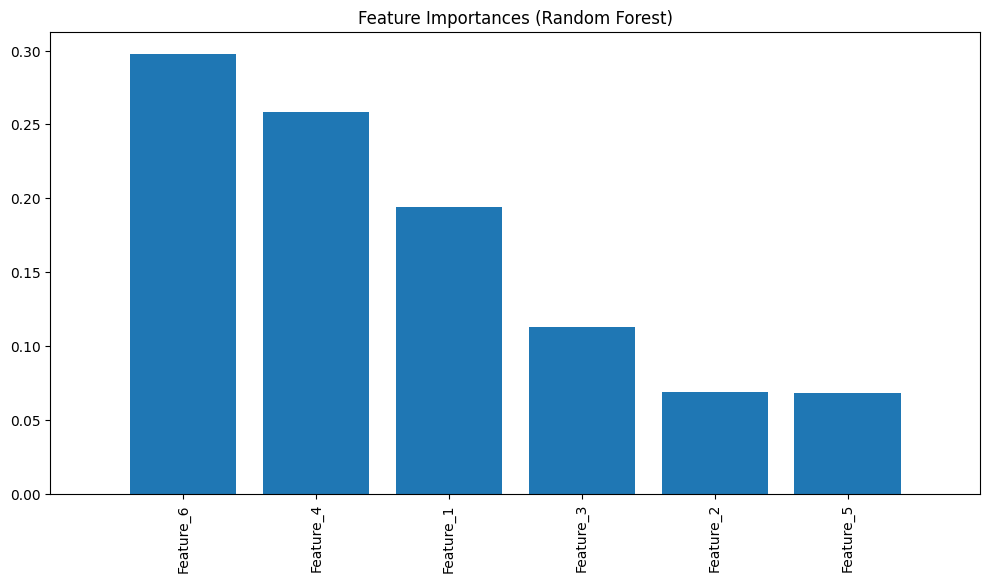

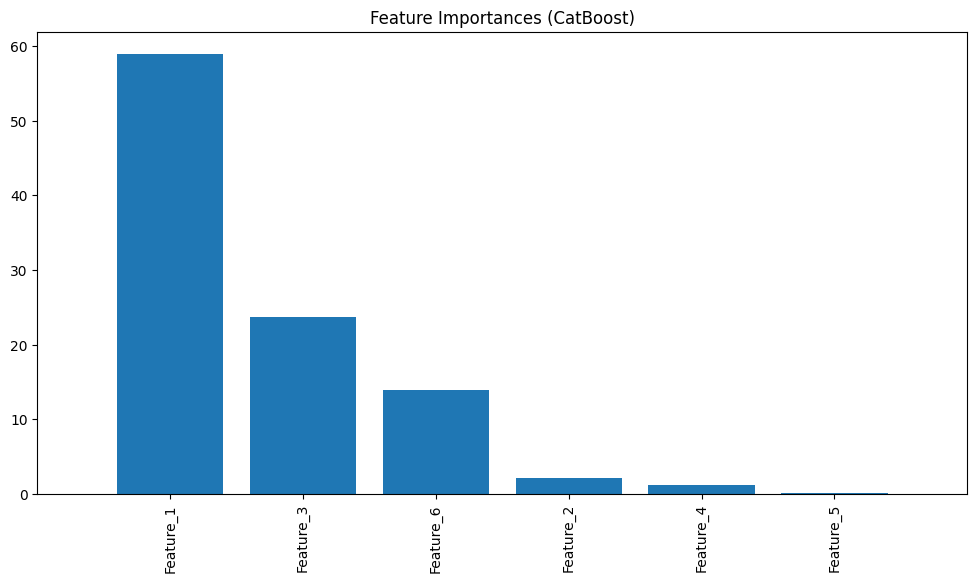

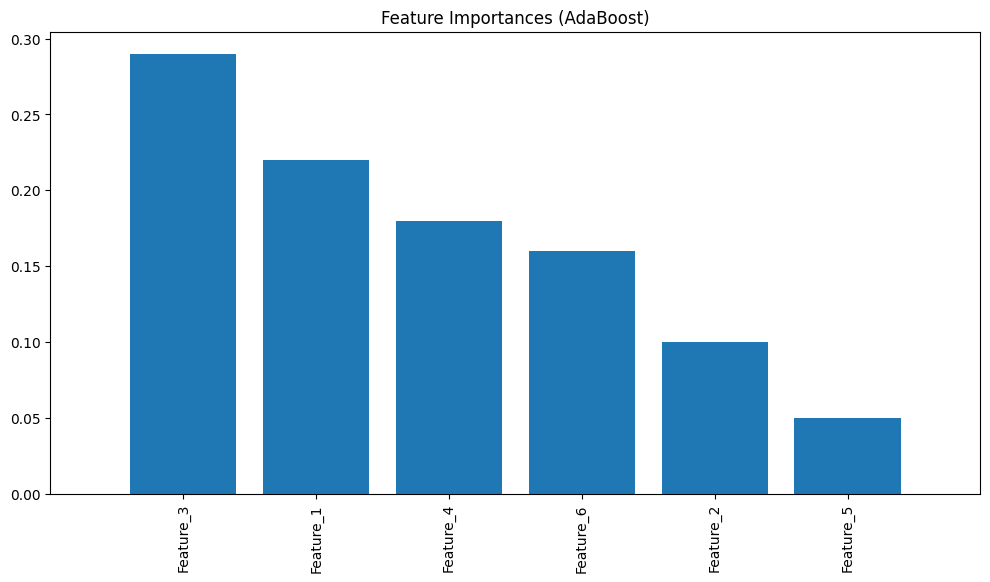

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Correct way to extract feature names
feature_names = train_df_balanced.drop('Activity', axis=1).columns  # Extract feature names from original DataFrame

# Feature importance for Random Forest
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices_rf], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Feature importance for CatBoost
importances_cat = cat.get_feature_importance()
indices_cat = np.argsort(importances_cat)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (CatBoost)")
plt.bar(range(X_train.shape[1]), importances_cat[indices_cat], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices_cat], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Feature importance for AdaBoost
# Check if the base estimator has feature importances
if hasattr(ada, 'feature_importances_'):
    importances_ada = ada.feature_importances_
else:
    # Aggregate feature importances from all the trees in AdaBoost
    importances_ada = np.mean([
        estimator.feature_importances_ for estimator in ada.estimators_
    ], axis=0)

indices_ada = np.argsort(importances_ada)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (AdaBoost)")
plt.bar(range(X_train.shape[1]), importances_ada[indices_ada], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices_ada], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


# Feature Visualization

This section visualizes a subset of features from the balanced training dataset using histograms and scatter plots.

## Data Preparation

- **Feature Selection**: A subset of the first five features is chosen for visualization to keep the plots manageable.
- **Subset Creation**: A DataFrame is created with these features and the target variable `'Activity'`.
- **Sampling**: Optionally, a sample of 1000 rows is taken from the data to speed up plotting.

## Visualization

### Histogram Plots (Diagonal)

Histograms are plotted for each feature on the diagonal of the grid, showing the distribution of values for each feature.

### Scatter Plots (Off-Diagonal)

Scatter plots are used to visualize relationships between pairs of features:

- **Color Coding**: Points are color-coded based on the target variable `'Activity'`, with colors indicating different activity categories.
- **Legend**: A legend is added to the scatter plots to identify activity categories.

### Grid Layout

- **Subplots**: A grid of subplots is created where each row and column corresponds to a feature.
- **Plot Adjustments**: The layout is adjusted to ensure plots are well-spaced and readable.

These visualizations help in understanding the distributions and relationships between features, as well as how different features interact with the target variable.


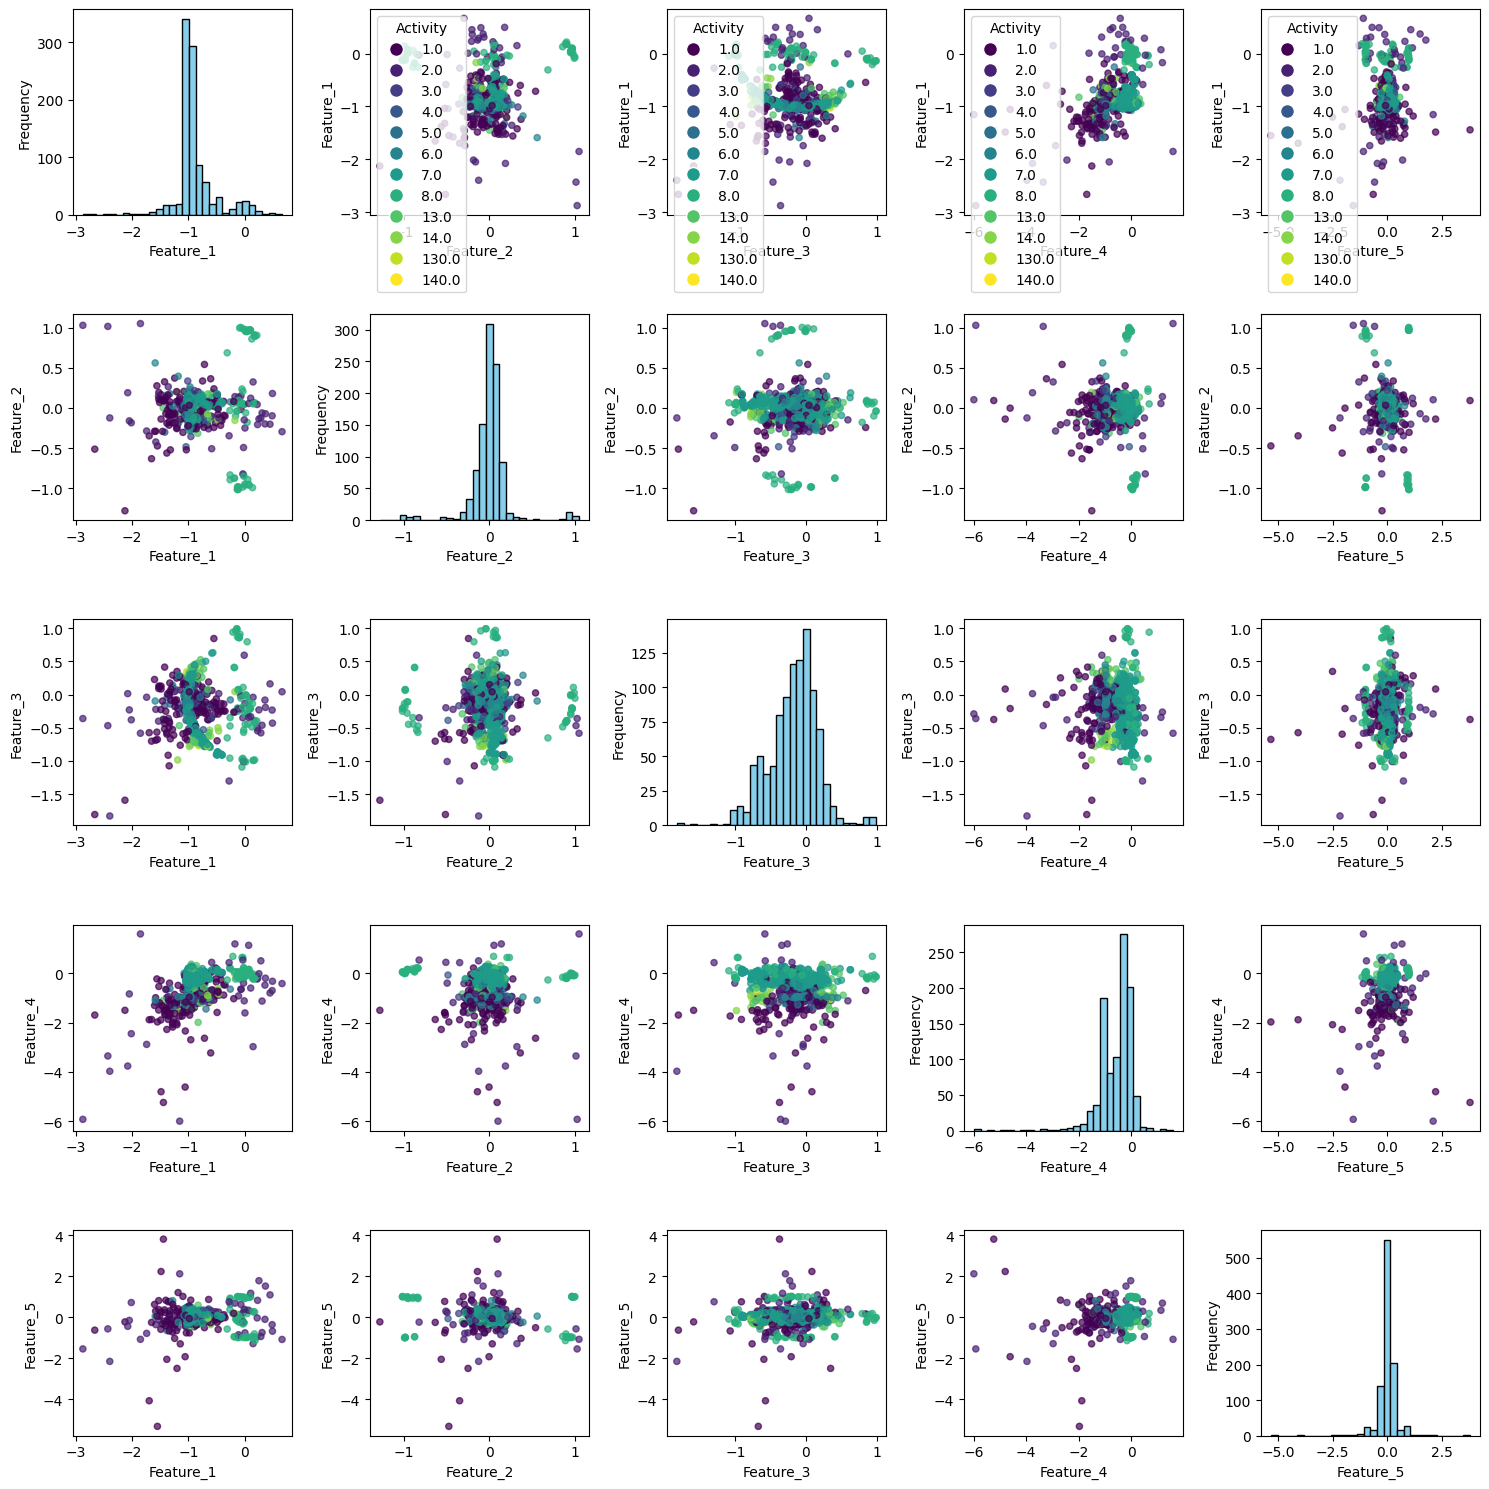

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Extract the feature columns from the DataFrame (before scaling)
feature_columns = train_df_balanced.drop('Activity', axis=1).columns[:5]  # Select a subset for easier visualization

# Create a DataFrame that includes only the selected feature columns and the target variable 'Activity'
subset_df = train_df_balanced[feature_columns].copy()
subset_df['Activity'] = train_df_balanced['Activity']

# Optionally, sample a subset of the data to speed up plotting
sample_size = 1000  # Adjust sample size as needed
if len(subset_df) > sample_size:
    subset_df = subset_df.sample(n=sample_size, random_state=1)

# Get the number of features
num_features = len(feature_columns)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_features, ncols=num_features, figsize=(15, 15))

# Iterate over the rows and columns of the subplot grid
for i in range(num_features):
    for j in range(num_features):
        ax = axes[i, j]
        
        if i == j:
            # Diagonal: Plot histogram of the feature
            ax.hist(subset_df[feature_columns[i]].dropna(), bins=30, color='skyblue', edgecolor='black')
            ax.set_xlabel(feature_columns[i])
            ax.set_ylabel('Frequency')
        else:
            # Off-diagonal: Plot scatter plot of the features
            scatter = ax.scatter(subset_df[feature_columns[j]], subset_df[feature_columns[i]],
                                c=subset_df['Activity'].astype('category').cat.codes, cmap='viridis', alpha=0.7, s=20)
            ax.set_xlabel(feature_columns[j])
            ax.set_ylabel(feature_columns[i])
            
            # Add legend for scatter plot
            if i == 0:
                # Adding a legend with the correct labels
                unique_activities = subset_df['Activity'].astype('category').cat.categories
                handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(k)),
                                     markersize=10, linestyle='') for k in range(len(unique_activities))]
                ax.legend(handles, unique_activities, title='Activity')

# Adjust layout
plt.tight_layout()
plt.show()
